# Research Question

Our goal is to predict whether or not a patient will be readmitted to a hospital within 30 days of their initial discharge. We will be using the K-Nearest Neighbor (KNN) method to examine the patient's pre-existing health conditions as well as demographics such as gender and age.

# Method Justification

KNN works by grouping records together that have similar features. By doing this to our patient data we can see if a set of features is likely to contribute to readmissions. Predicitons made by KNN assume that similar inputs produce similar outputs. 

## Tools, Packages, and Libraries

We'll be using python for this analysis. Python has many libraries that make the data manipulation and analysis tasks that we are going to perform easier. The particular libraries that we will make use of are:

- ``Numpy`` and ``pandas`` for standard dataframe and numerical operations
- ``sklearn`` for it's KNN implementation as well as it's ``preprocessing`` module for scalers, ``model_selection`` module for train/test splits, and ``metrics`` for the AUC score.
- ``matplotlib`` for plots

We will now install and import them:

In [1]:
%%capture
# install packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn


# import packages
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt


# random seed
import random
random.seed(10)

# Data Preparation

## Selection
The variables that we will be including in our analysis are:

Variable | Type
--- | ---
Age| continuous
Gender| categorical
VitD_levels| continuous
Soft_drink| categorical
HighBlood| categorical
Stroke| categorical
Overweight| categorical
Arthritis| categorical
Diabetes| categorical
Hyperlipidemia| categorical
BackPain| categorical
Anxiety| categorical
Allergic_rhinitis| categorical
Reflux_esophagitis| categorical
Asthma| categorical
ReAdmis | categorical

In [2]:
# import data
df = pd.read_csv("data/medical_clean.csv")
df = df.loc[1:, ['Age',
    'Gender',
    'VitD_levels',
    'Soft_drink',
    'HighBlood',
    'Stroke',
    'Complication_risk',
    'Overweight',
    'Arthritis',
    'Diabetes',
    'Hyperlipidemia',
    'BackPain',
    'Anxiety',
    'Allergic_rhinitis',
    'Reflux_esophagitis',
    'Asthma', 
    'ReAdmis'
]]
df.head()

# Define outcome and predictors
outcome = 'ReAdmis'
predictors = [
    'Age',
    'Gender',
    'VitD_levels',
    'Soft_drink',
    'HighBlood',
    'Stroke',
    'Complication_risk',
    'Overweight',
    'Arthritis',
    'Diabetes',
    'Hyperlipidemia',
    'BackPain',
    'Anxiety',
    'Allergic_rhinitis',
    'Reflux_esophagitis',
    'Asthma',
]

## Cleaning and Scaling
There are many categorical variables in this set. KNN requires numeric variables, so we will need to convert them. We will also separate the dataset into outcome and predictors (X and y) and apply a scaler to the data.

The cleaned dataset can be found in ``medical_clean_numeric.csv``

In [3]:
%%capture
cat_columns = df.select_dtypes(exclude="number").columns

# Give categorical columns a numeric value
for col in cat_columns:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

# export
df.to_csv("data/medical_clean_numeric.csv", index=False)

# Separate into predictors and outcome

X = df.loc[1:, predictors]
y = df.loc[1:, outcome]

# apply scaler
scaler = StandardScaler()
scaler.fit(X * 1.0)
X = scaler.transform(X * 1.0)

## Train test split

We'll also separating the data into training and testing sets on an 80/20 split. Copies of the train and test data can be found in ``train.csv`` and ``test.csv``, respectively.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

train = pd.DataFrame(X_train, columns=predictors)
train[outcome] = y_train
train.to_csv("data/train.csv", index=False)

test = pd.DataFrame(X_test, columns=predictors)
test[outcome] = y_test
test.to_csv("data/test.csv", index=False)

# Analysis

Now that the data has been cleaned and split into train and test data we are ready to run a KNN Classifier!

We'll try the analysis using different values for *k*. 

In [5]:
neighbors = range(2, 21)
scores = np.empty(len(neighbors))

# Loop over different values of k
best_k = 0
best_score = -1
best_model = None
for i, k in enumerate(neighbors):
    #Create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, y_train)

    # Score the classifier and add it the list of scores
    score = knn.score(X_test, y_test)
    scores[i] = score

    if score > best_score:
        best_score = score
        best_k = k
        best_model = knn
        

print('\nBest k-value is %i with a score of %.3f' % (best_k, best_score))

y_pred = best_model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
print('AUC score: %.3f' % auc_score)


Best k-value is 12 with a score of 0.624
AUC score: 0.505


We'll visualize the data with a graph as well.

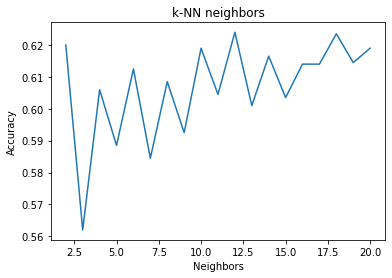

In [6]:
plt.title('k-NN neighbors')
plt.plot(neighbors, scores, label='Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Summary and Implications

## Model effectiveness

The best version of the model we produces used a k-value of 12 and achieved an accuracy rating of 0.624 as well as an Area Under the Curve (AUC) score of .505. This means that the model is *slightly* better than random guessing. 

The model's accuracy could use improvement. One limitation is the lack of complete patient medical records. Perhaps if the model could take into consideration more of the patient's medical history the accuracy could be increased. 

At the moment the best course of action would be to gather more patient records to produce a better model. 